Hypothesis testing lets you answer questions about your datasets in a statistically rigorous way. In this course, you'll grow your Python analytical skills as you learn how and when to use common tests like t-tests, proportion tests, and chi-square tests. Working with real-world data, including Stack Overflow user feedback, you'll gain a deep understanding of how these tests work, and the key assumptions that underpin them. You'll also discover how different tests are related using the “there is only one test" framework, before learning how to use non-parametric tests to go beyond the limitations of side-step the requirements of hypothesis tests.

# 20.1/ Introduction to Hypothesis Testing
## 20.1.1/ Hypothesis tests and z-scores

In 2013, Electronic Arts, or EA, launched a video game called SimCity 5. Leading up to its release, they wanted to increase pre-order sales. They used an experimental design technique called A/B testing, which has roots in hypothesis testing, to test different advertising scenarios and see which improved sales the most. Website visitors were split into a control group and a treatment group. Each group saw a different version of the game's pre-order sales page.<br>
The results of the A/B test were surprising. The treatment page without the advertisement resulted in 43 percent higher sales than the control page with the advert. The experiment proved that our intuition that more discount adverts would result in more sales was false.<br>
hypothesis:: the mean income of data scientists is 110,000. but actually aro beshi ashtese mean value.we will see about this z score. Is that a big or small number? Determining that is the goal of this course.In particular, we can now state one of the uses of hypothesis testing: determining whether a sample statistic is close to or far away from an expected value.<br>
<i><u>Standard normal distribution:</i></u> normal distribution with mean = 0 + standard deviation = 1

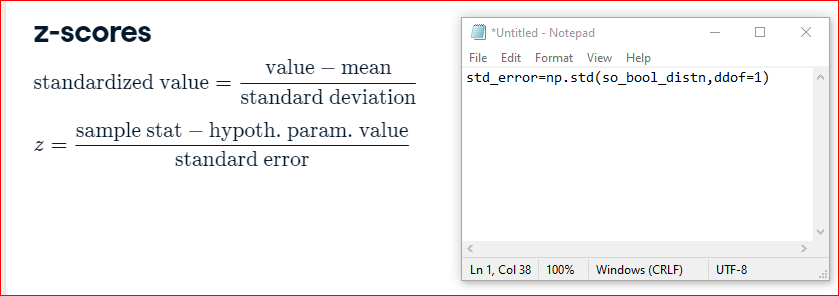

### E1//Calculating the sample mean
The late_shipments dataset contains supply chain data on the delivery of medical supplies. Each row represents one delivery of a part. The late columns denotes whether or not the part was delivered late. A value of "Yes" means that the part was delivered late, and a value of "No" means the part was delivered on time.

You'll begin your analysis by calculating a point estimate (or sample statistic), namely the proportion of late shipments.

In pandas, a value's proportion in a categorical DataFrame column can be quickly calculated using the syntax:

prop = (df['col'] == val).mean()
late_shipments is available, and pandas is loaded as pd.

In [1]:
import pandas as pd
import numpy as np
import pyarrow
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
late_shipments=pd.read_feather('G:\\datacamp\\20.Hypothesis Testing in Python\\late_shipments.feather')
#print(late_shipments.head())
# Calculate the proportion of late shipments
late_prop_samp = (late_shipments['late']=='Yes').mean()
# Print the results
print(late_prop_samp)

0.061


In [3]:
late_shipments.head()

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,...,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
0,36203.0,Nigeria,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,...,2996.0,266644.00,89.00,0.89,"Alere Medical Co., Ltd.",Yes,1426.0,33279.83,expensive,373.83
1,30998.0,Botswana,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,25.0,800.00,32.00,1.60,"Trinity Biotech, Plc",Yes,10.0,559.89,reasonable,1.72
2,69871.0,Vietnam,PMO - US,Direct Drop,EXW,Air,0.0,No,ARV,Adult,...,22925.0,110040.00,4.80,0.08,Hetero Unit III Hyderabad IN,Yes,3723.0,19056.13,expensive,181.57
3,17648.0,South Africa,PMO - US,Direct Drop,DDP,Ocean,0.0,No,ARV,Adult,...,152535.0,361507.95,2.37,0.04,"Aurobindo Unit III, India",Yes,7698.0,11372.23,expensive,779.41
4,5647.0,Uganda,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test - Ancillary,...,850.0,8.50,0.01,0.00,Inverness Japan,Yes,56.0,360.00,reasonable,0.01


### E2//Calculating a z-score
One standardized value of interest in a hypothesis test is called a z-score. To calculate it, you need three numbers: the sample statistic (point estimate), the hypothesized statistic, and the standard error of the statistic (estimated from the bootstrap distribution).<br>
late_shipments_boot_distn is a bootstrap distribution of the proportion of late shipments, available as a list.

In [4]:
late_shipments.columns
late_shipments['late']

0      Yes
1       No
2       No
3       No
4       No
      ... 
995     No
996     No
997    Yes
998     No
999     No
Name: late, Length: 1000, dtype: object

In [5]:
###########bootstrap sample.. we dont need these
#late_prop_resample=late_shipments.sample(n=500)
#late_prop_resample['late'].hist()

#late_prop_samp_y=[]
#for i in range(1000):
 #   late_prop_samp_y.append((late_prop_resample['late']=='Yes').mean())
#late_prop_samp_y

In [6]:
late_shipments_boot_distn=[]
for i in range(5000):
   # late_prop_samp_y = (late_shipments['late']=='Yes').mean()
    late_shipments_boot_distn.append(
    np.mean(late_shipments.sample(frac=1,replace=True)['late']=='Yes'))   ##############
late_shipments_boot_distn

[0.055,
 0.057,
 0.057,
 0.051,
 0.063,
 0.075,
 0.075,
 0.053,
 0.048,
 0.059,
 0.086,
 0.067,
 0.067,
 0.055,
 0.055,
 0.057,
 0.053,
 0.083,
 0.065,
 0.057,
 0.064,
 0.051,
 0.065,
 0.055,
 0.063,
 0.055,
 0.066,
 0.067,
 0.061,
 0.06,
 0.071,
 0.056,
 0.074,
 0.071,
 0.065,
 0.055,
 0.067,
 0.059,
 0.059,
 0.062,
 0.056,
 0.059,
 0.061,
 0.073,
 0.06,
 0.056,
 0.063,
 0.057,
 0.067,
 0.067,
 0.062,
 0.056,
 0.063,
 0.049,
 0.053,
 0.047,
 0.054,
 0.076,
 0.064,
 0.056,
 0.051,
 0.055,
 0.063,
 0.052,
 0.067,
 0.069,
 0.051,
 0.078,
 0.065,
 0.057,
 0.058,
 0.068,
 0.049,
 0.052,
 0.066,
 0.063,
 0.07,
 0.055,
 0.05,
 0.062,
 0.063,
 0.064,
 0.05,
 0.062,
 0.062,
 0.064,
 0.067,
 0.049,
 0.064,
 0.059,
 0.064,
 0.071,
 0.061,
 0.055,
 0.065,
 0.071,
 0.067,
 0.064,
 0.054,
 0.065,
 0.057,
 0.055,
 0.056,
 0.061,
 0.057,
 0.068,
 0.06,
 0.057,
 0.058,
 0.059,
 0.078,
 0.044,
 0.066,
 0.062,
 0.064,
 0.063,
 0.075,
 0.063,
 0.063,
 0.062,
 0.065,
 0.059,
 0.068,
 0.063,
 0.066,
 0.061

In [7]:
######################################zscore#######################
print(np.mean(late_shipments_boot_distn))

# Hypothesize that the proportion is 6%
late_prop_hyp = .06

# Calculate the standard error
std_error = np.std(late_shipments_boot_distn)

# Find z-score of late_prop_samp
z_score = (late_prop_samp-late_prop_hyp)/std_error
z_score2=(np.mean(late_shipments_boot_distn)-late_prop_hyp)/std_error
# Print z_score
print(z_score,z_score2)

0.06102040000000001
0.13117534129642766 0.13385131825887617


In [8]:
stack_overflow=pd.read_feather('G:\\datacamp\\20.Hypothesis Testing in Python\\stack_overflow.feather')
stack_overflow.head()

,respondent,main_branch,hobbyist,age,age_1st_code,age_first_code_cut,comp_freq,comp_total,converted_comp,country,...,survey_length,trans,undergrad_major,webframe_desire_next_year,webframe_worked_with,welcome_change,work_week_hrs,years_code,years_code_pro,age_cat
0,36.0,"I am not primarily a developer, but I write co...",Yes,34.0,30.0,adult,Yearly,60000.0,77556.0,United Kingdom,...,Appropriate in length,No,"Computer science, computer engineering, or sof...",Express;React.js,Express;React.js,Just as welcome now as I felt last year,40.0,4.0,3.0,At least 30
1,47.0,I am a developer by profession,Yes,53.0,10.0,child,Yearly,58000.0,74970.0,United Kingdom,...,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Flask;Spring,Flask;Spring,Just as welcome now as I felt last year,40.0,43.0,28.0,At least 30
2,69.0,I am a developer by profession,Yes,25.0,12.0,child,Yearly,550000.0,594539.0,France,...,Too short,No,"Computer science, computer engineering, or sof...",Django;Flask,Django;Flask,Just as welcome now as I felt last year,40.0,13.0,3.0,Under 30
3,125.0,"I am not primarily a developer, but I write co...",Yes,41.0,30.0,adult,Monthly,200000.0,2000000.0,United States,...,Appropriate in length,No,None,None,None,Just as welcome now as I felt last year,40.0,11.0,11.0,At least 30
4,147.0,"I am not primarily a developer, but I write co...",No,28.0,15.0,adult,Yearly,50000.0,37816.0,Canada,...,Appropriate in length,No,"Another engineering discipline (such as civil,...",None,Express;Flask,Just as welcome now as I felt last year,40.0,5.0,3.0,Under 30


## 20.1.2/ p-values
our hypothesis for (((stack_overflow.age_first_code_cut))) is that 35% people start programming as a child.
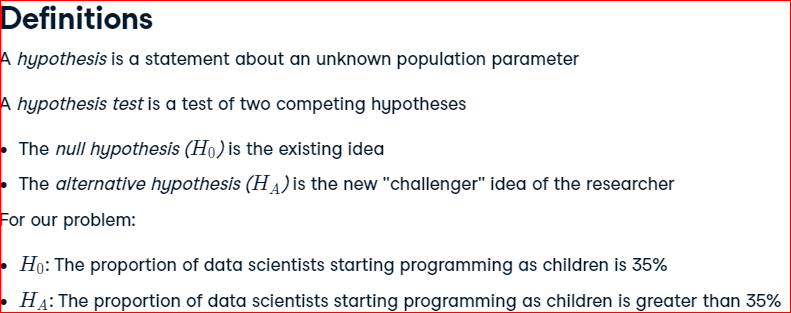

<br>
Hypothesis tests are like criminal trials.The defendant can be either guilty or not guilty, and likewise, only one of the hypotheses can be true. Initially, the defendant is assumed to be not guilty and, similarly, we initially assume that the null hypothesis(Ho) is true. This only changes if the sample provides enough evidence to reject it.<br>
Rather than saying we accept the alternative hypothesis, it is convention to refer to rejecting the null hypothesis, or failing to reject the null hypothesis. If the evidence is <u>"beyond a reasonable doubt"</u> that the defendant committed the crime, then a "guilty" verdict is given. The hypothesis testing equivalent of "beyond a reasonable doubt" is known as the significance level - more on this later in the chapter.

**here are three types of tests, and the phrasing of the alternative hypothesis determines which type we should use. If we are checking for a difference compared to a hypothesized value, we look for extreme values in either tail and perform a two-tailed test. If the alternative hypothesis uses language like "less" or "fewer", we perform a left-tailed test. Words like "greater" or "exceeds" correspond to a right-tailed test. For the Stack Overflow hypothesis test, we need a right-tailed test since we are looking for extreme values in the right tail.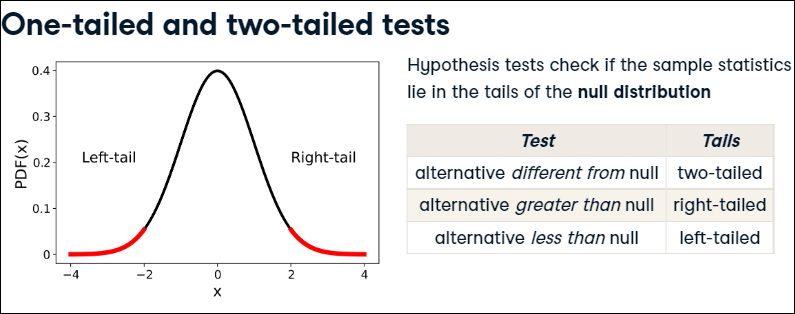 here HA>35% .SO WE NEED RIGHT**

p-values measure the strength of support for the null hypothesis, or in other words, they measure the probability of obtaining a result, assuming the null hypothesis is true. Large p-values mean our statistic is producing a result that is likely not in a tail of our null distribution, and chance could be a good explanation for the result. Small p-values mean our statistic is producing a result likely in the tail of our null distribution. Because p-values are probabilities, they are always between zero and one.
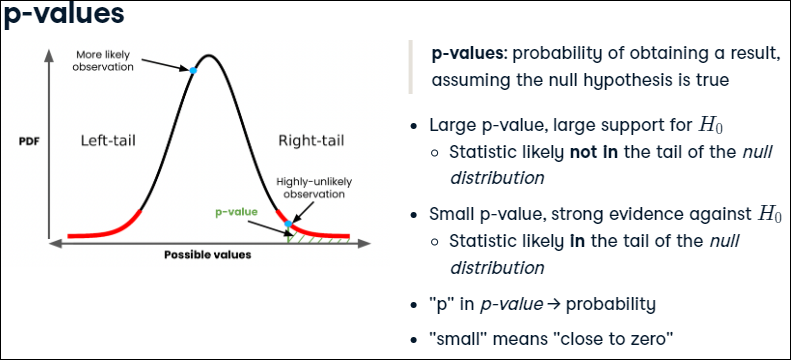
<br>
>Left-tailed test → use norm.cdf()<br>
Right-tailed test → use 1 - norm.cdf()<br>
1 - norm.cdf(z_score, loc=0, scale=1)

### E1//Calculating p-values
The null hypothesis, , is that the proportion of late shipments is six percent.

The alternative hypothesis, , is that the proportion of late shipments is greater than six percent.

In [9]:
# Calculate the z-score of late_prop_samp
z_score = (late_prop_samp-late_prop_hyp)/std_error

# Calculate the p-value
p_value = 1-norm.cdf(z_score,loc=0,scale=1)
                 
# Print the p-value
print(p_value) 

0.44781830108999987


## 20.1.3/ Significance level(α)
The cutoff point is known as the significance level(α), and is denoted alpha. The appropriate significance level depends on the dataset and the discipline worked in. α can be .2,.1,.05 or .01 **It's important that we decide what the appropriate significance level should be before we run our test**If p ≤ α, reject Ho, else fail to reject Ho...α should be set prior to conducting the hypothesis test.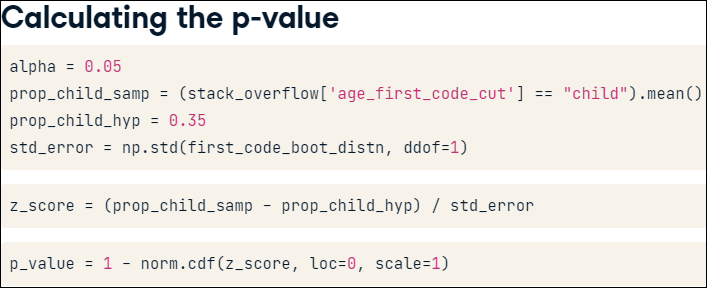 the result is .03 which rejects the Ho

**Confidence intervals**
For a significance level of α, it's common to choose a confidence interval level of ((1 - α))<br>
>α = 0.05 → 95% confidence interval<br>
lower = np.quantile(first_code_boot_distn, 0.025)<br>
upper = np.quantile(first_code_boot_distn, 0.975)<br>
print((lower, upper))<br>

<br>
for hypothesis testing, there are two ways to get it right, and two types of error. If we support the alternative hypothesis when the null hypothesis was correct, we made a false positive error. If we support the null hypothesis when the alternative hypothesis was correct, we made a false negative error. These errors are sometimes known as type one and type two errors, respectively.
![types%20of%20error.PNG](attachment:types%20of%20error.PNG)
**Possible errors in our example**
If p ≤ α, we reject Ho :<br>
A false positive (Type I) error: data scientists didn't start coding as children at a higher rate<br>
If p > α, we fail to reject Ho :<br>
A false negative (Type II) error: data scientists started coding as children at a higher rate<br>

### E1/Calculating a confidence interval
If you give a single estimate of a sample statistic, you are bound to be wrong by some amount. For example, the hypothesized proportion of late shipments was 6%. Even if evidence suggests the null hypothesis that the proportion of late shipments is equal to this, for any new sample of shipments, the proportion is likely to be a little different due to sampling variability. Consequently, it's a good idea to state a confidence interval. That is, you say, "we are 95% 'confident' that the proportion of late shipments is between A and B" (for some value of A and B).

In [10]:
# Calculate 95% confidence interval using quantile method
lower = np.quantile(late_shipments_boot_distn,.025)
upper = np.quantile(late_shipments_boot_distn,.975)

# Print the confidence interval
print((lower, upper))

(0.047, 0.077)


**Question**
Does the confidence interval match up with the conclusion to stick with the original assumption that 6% is a reasonable value for the unknown population parameter?
Possible Answers

Yes, since 0.06 is included in the 95% confidence interval and we failed to reject Ho due to a large p-value, the results are similar.

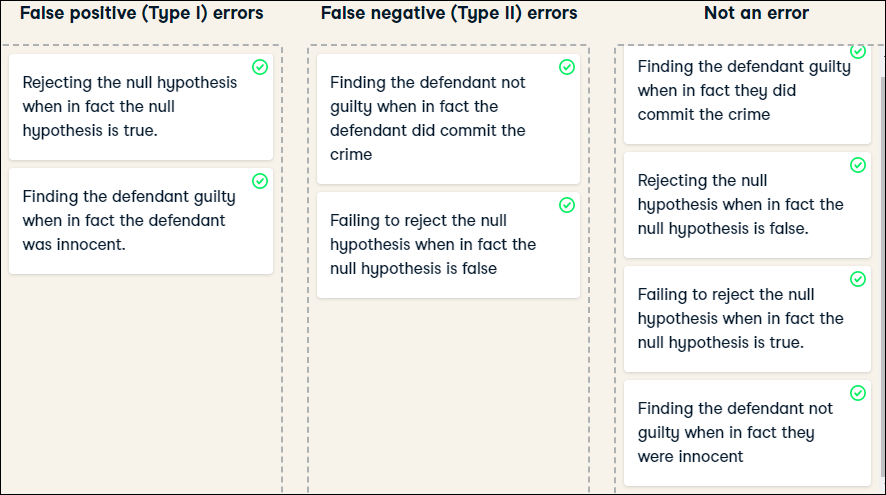

# 20.2/ Two-Sample and ANOVA Tests
## 20.2.1/ Performing t-tests(Test Statistics)
**Two-sample problems:** Here, we'll look at a related problem of comparing sample statistics across groups in a variable. We can ask questions about differences in compensation across the two age groups, such as, are users who first programmed as a child better compensated than those that started as adults?<br>
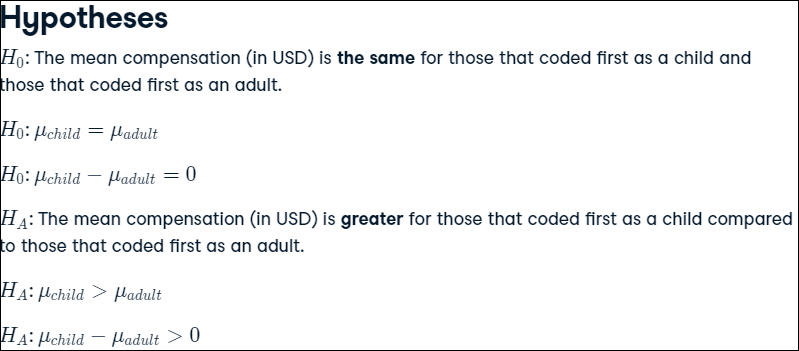
<i>s1/Calculating groupwise summary statistics: stack_overflow.groupby('age_first_code_cut')['converted_comp'].mean()</i> we can see that mean child comp is higher! But Is that increase statistically significant or could it be explained by sampling variability?
 <i>s2/Test statistics: </i>Although we don't know the population mean, we estimate it using the sample mean.

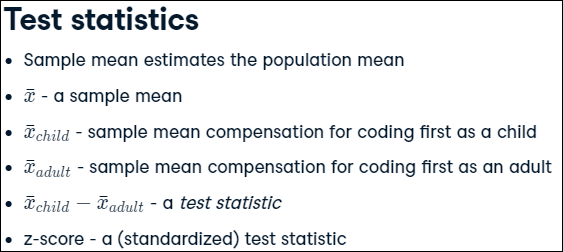
 <i>s3/Standardizing the test statistic: </i>

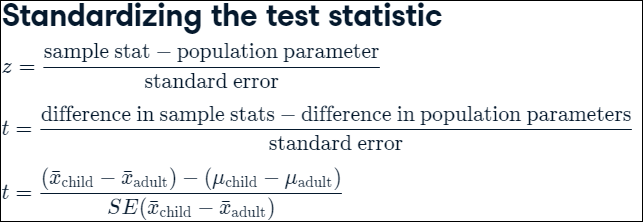

To calculate the standard error, needed for the denominator of the test statistic equation, bootstrapping tends to be a good option. However, there is an easier way to approximate it.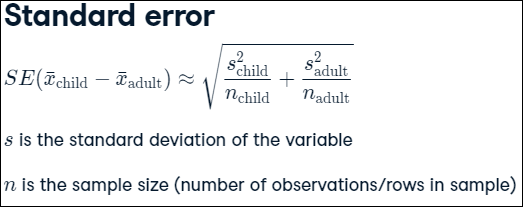

<i>s4//Assuming the null hypothesis is true:</i>
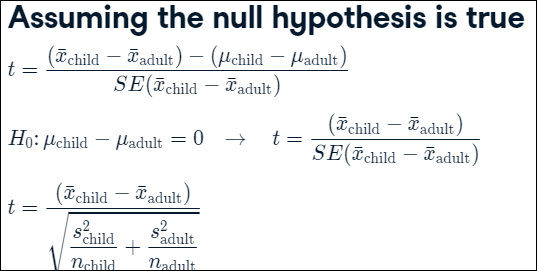

>>>numerator = xbar_child - xbar_adult<br>
denominator = np.sqrt(s_child ** 2 / n_child + s_adult ** 2 / n_adult)<br>
t_stat = numerator / denominator<br>

The t-statistic is around one-point-eight-seven. Just as with z-scores, we can't draw any conclusions yet; for that, we'll need to wait for the next video.

**Hypothesis testing work flow**
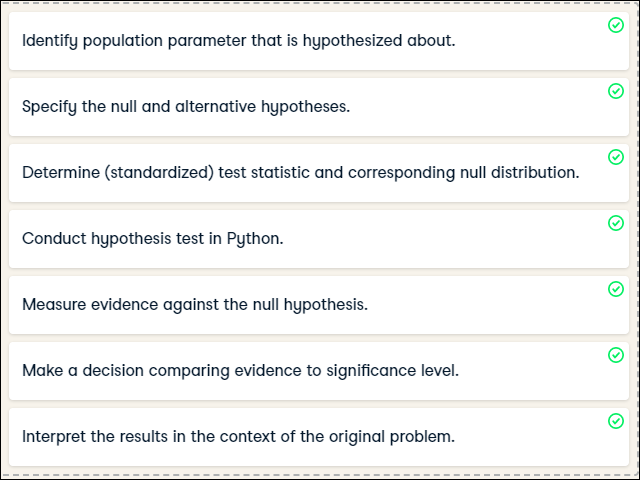

### E1// Two sample mean test statistic
While trying to determine why some shipments are late, you may wonder if the weight of the shipments that were on time is less than the weight of the shipments that were late. The late_shipments dataset has been split into a "yes" group, where late == "Yes" and a "no" group where late == "No". The weight of the shipment is given in the weight_kilograms variable.

The sample means for the two groups are available as xbar_no and xbar_yes. The sample standard deviations are s_no and s_yes. The sample sizes are n_no and n_yes. numpy is also loaded as np.

In [11]:
late_shipments.columns

Index(['id', 'country', 'managed_by', 'fulfill_via', 'vendor_inco_term',
       'shipment_mode', 'late_delivery', 'late', 'product_group',
       'sub_classification', 'vendor', 'item_description',
       'molecule_test_type', 'brand', 'dosage', 'dosage_form',
       'unit_of_measure_per_pack', 'line_item_quantity', 'line_item_value',
       'pack_price', 'unit_price', 'manufacturing_site',
       'first_line_designation', 'weight_kilograms', 'freight_cost_usd',
       'freight_cost_groups', 'line_item_insurance_usd'],
      dtype='object')

In [12]:
#late_shipments_weight=pd.DataFrame(late_shipments.groupby('late')['weight_kilograms'].mean())
#late_shipments_weight

In [13]:
#xbar_yes=late_shipments_weight[late_shipments_weight.index=='Yes']['weight_kilograms']
#print(xbar_yes)
#xbar_no=late_shipments_weight[late_shipments_weight.index=='No']['weight_kilograms']
#print(xbar_no)
#s_yes=late_shipments_weight_std[late_shipments_weight.index=='Yes']['weight_kilograms']
#s_no=late_shipments_weight_std[late_shipments_weight.index=='No']['weight_kilograms']
#s_yes

In [14]:
late_shipments_weight=late_shipments.groupby('late')['weight_kilograms'].mean()
print(late_shipments_weight)
late_shipments_weight_std=(late_shipments.groupby('late')['weight_kilograms'].std())
late_shipments_weight_std

late
No     1897.791267
Yes    2715.672131
Name: weight_kilograms, dtype: float64


late
No     3154.039507
Yes    2544.688211
Name: weight_kilograms, dtype: float64

In [15]:
late_shipments_weight_count=(late_shipments.groupby('late')['weight_kilograms'].count())
late_shipments_weight_count

late
No     939
Yes     61
Name: weight_kilograms, dtype: int64

In [16]:
xbar_no=late_shipments_weight['No']
xbar_yes=late_shipments_weight['Yes']
print(xbar_yes,xbar_no)

2715.6721311475408 1897.7912673056444


In [17]:
s_yes=late_shipments_weight_std['Yes']
s_no=late_shipments_weight_std['No']
print(s_yes,s_no)

2544.688210903328 3154.0395070841687


In [18]:
n_yes=late_shipments_weight_count['Yes']
n_no=late_shipments_weight_count['No']
print(n_yes,n_no)

61 939


In [19]:
## E1////////ANs
# Calculate the numerator of the test statistic
numerator = xbar_no-xbar_yes

# Calculate the denominator of the test statistic
denominator = np.sqrt(s_no**2/n_no+s_yes**2/n_yes)

# Calculate the test statistic
t_stat = numerator/denominator
t_stat

-2.3936661778766433

## 20.2.2//Calculating p-values from t-statistics
#### Degrees of Freedom(Df)
As we increase the degrees of freedom, the t-distribution gets closer to the normal distribution. In fact, a normal distribution is a t-distribution with infinite degrees of freedom. Degrees of freedom are defined as the maximum number of logically independent values in the data sample. Degrees of freedom are the number of independent variables that can be estimated in a statistical analysis. These value of these variables are without constraint, although the values do impost restrictions on other variables if the data set is to comply with estimate parameters.
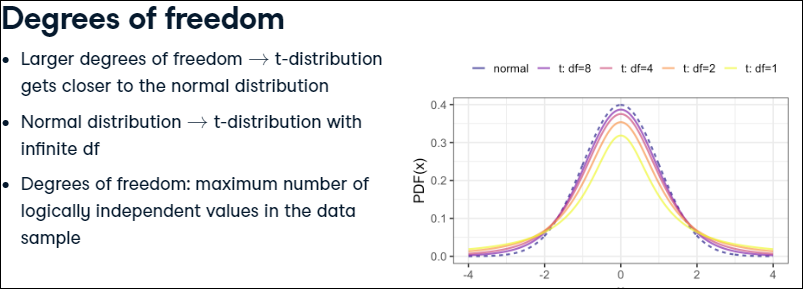

Remember the hypothesis and significance level(α)???so if p<α, we have to reject the hypothesis Ho.
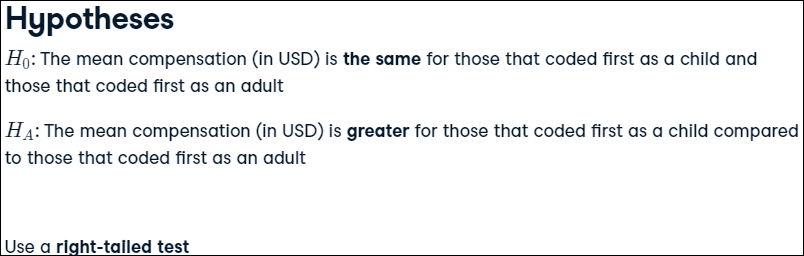
we transformed the z-score with the normal CDF. Since it was a right-tailed test, we subtracted the result from one. In the previous video, we used an approximation for the test statistic standard error using sample information. Using this approximation adds more uncertainty and that's why this is a t instead of a z problem. The t distribution allows for more uncertainty when using multiple estimates in a single statistic calculation.<br>
<span class="mark">z-statistic</span>: needed when using one sample statistic to estimate a population parameter<br>
<span class="mark">t-statistic</span>: needed when using multiple sample statistics to estimate a population parameter<br>
**The multiple estimates correspond to the sample mean and the sample standard deviation.**
<br>
>>>from scipy.stats import t<br>
1 - t.cdf(t_stat, df=degrees_of_freedom)<br>

>.0308 ////less than the α(.1) so we should reject the null hypothesis in favor of the alternative hypothesis that Stack Overflow data scientists who started coding as children earn more.

### E1/Why is t needed?
The process for calculating p-values is to start with the sample statistic, standardize it to get a test statistic, then transform it via a cumulative distribution function. In Chapter 1, that final transformation was denoted , and the CDF transformation used the (standard normal) z-distribution. In the last video, the test statistic was denoted , and the transformation used the t-distribution.<br>
In which hypothesis testing scenario is a t-distribution needed instead of the z-distribution?
The t-distribution is just another name for the z-distribution, so they can be used interchangeably.<br>
The t-distribution is the same thing as the z-distribution for very small sample sizes.<br>
When a sample standard deviation is used in estimating a standard error.(Cor Ans)<br>
when you are comparing the means of three or more samples, rather than comparing a single sample mean to a value.<br>

<div class="mark">
### E2/ From t to p
Previously, you calculated the test statistic for the two-sample problem of whether the mean weight of shipments is smaller for shipments that weren't late (late == "No") compared to shipments that were late (late == "Yes"). In order to make decisions about it, you need to transform the test statistic with a cumulative distribution function to get a p-value.
<br>
Recall the hypotheses:<br>

Ho: The mean weight of shipments that weren't late is the same as the mean weight of shipments that were late.

HA: The mean weight of shipments that weren't late is less than the mean weight of shipments that were late.<br>

The test statistic, t_stat, is available, as are the samples sizes for each group, n_no and n_yes. Use a significance level of alpha = 0.05.<br>

t has also been imported from scipy.stats.</div><i class="fa fa-lightbulb-o "></i>

In [20]:
from scipy.stats import t
# Calculate the degrees of freedom
degrees_of_freedom = n_no + n_yes - 2

# Calculate the p-value from the test stat
p_value = t.cdf(t_stat, df=degrees_of_freedom)

# Print the p_value
print(p_value)

#Perspicacious p-value predictions! When the standard error is estimated from the sample standard deviation 
#and sample size, the test statistic is transformed into a p-value using the t-distribution.
# as .008<alpha so it rejects the null hypothesis

0.008432382146249523


## 20.2.3/ Paired t-tests(pingouin)
we used the t-distribution to compute a p-value from a standardized test statistic related to the difference in means across two groups. For 'repub_votes_potus_08_12' dataset:<br>
$H _O$:$μ  2008-μ  2012 $ =0<br>
$H _A$: $μ   2008-μ  2012 $ <0<br>
let, α=0.5<br>
One feature of this dataset is that the 2008 votes and the 2012 votes are paired, which means they aren't independent, since they both refer to the same county. This means voting patterns may occur due to county-level demographics and local politics, and we want to capture this pairing in our model.

In [21]:
repub_votes_potus_08_12=pd.read_feather('G:\\datacamp\\20.Hypothesis Testing in Python\\repub_votes_potus_08_12.feather')
repub_votes_potus_08_12.head()

,state,county,repub_percent_08,repub_percent_12
0,Alabama,Hale,38.957877,37.139882
1,Arkansas,Nevada,56.726272,58.983452
2,California,Lake,38.896719,39.331367
3,California,Ventura,42.923190,45.250693
4,Colorado,Lincoln,74.522569,73.764757


**From two samples to one**
For paired analyses, rather than considering the two variables separately, we can consider a single variable of the difference. This is stored in a DataFrame called sample_data with a column named diff. In this histogram of the difference, most values are between minus ten and ten, with at least one outlier.

<AxesSubplot:>

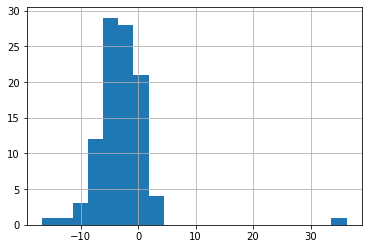

In [22]:
sample_data = repub_votes_potus_08_12
sample_data['diff'] = sample_data['repub_percent_08'] - sample_data['repub_percent_12']
sample_data['diff'].hist(bins=20)

In [23]:
xbar_diff = sample_data['diff'].mean()
xbar_diff

-2.8771090412429454

We can restate the hypotheses in terms of the single population mean, mu-diff, being equal to or less than zero.
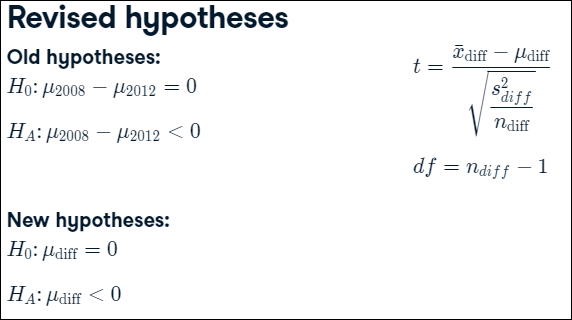
<br>
<br>
**Calculating p_value:**

In [24]:
n_diff = len(sample_data)
s_diff = sample_data['diff'].std()
print(n_diff,s_diff)
t_stat = (xbar_diff-0) / np.sqrt(s_diff**2/n_diff)
print(t_stat)
degrees_of_freedom=n_diff-1
p_value_repub = t.cdf(t_stat, df=n_diff-1)
p_value_repub

####The p-value is really small at around nine-point-six times ten to the minus eight. That means we reject 
##the null hypothesis in favor of the alternative hypothesis that the Republican candidates got a smaller 
#percentage of the vote in 2008 compared to 2012.

100 5.136737887231852
-5.601043121928492


9.572537285272304e-08

## Pingouin
Fortunately, there's an easier way. The pingouin package provides a variety of different methods for hypothesis testing and returns the results as a pandas DataFrame. Its output can be a little friendlier to work with than similar methods from scipy-dot-stats. <br>
One method from pingouin is ttest and it works with **array-like objects,** so the first argument is the Series of differences. **For a converted one sample test like this,** y specifies the hypothesized difference value from the null hypothesis, which is zero. The type of alternative hypothesis can be specified as two-sided, less, or greater, corresponding to two-tailed, left-tailed, and right-tailed tests, respectively.

In [25]:
help(pingouin.ttest)

NameError: name 'pingouin' is not defined

In [ ]:
import pingouin
pingouin.ttest(x=sample_data['diff'],y=0,alternative="less")

In [ ]:
#pip install pingouin

In [ ]:
pingouin.ttest(x=sample_data['repub_percent_08'],
y=sample_data['repub_percent_12'],
paired=True,      ##paired false hoile result alda.  default false
alternative="less")

### E1/Visualizing the difference
Before you start running hypothesis tests, it's a great idea to perform some exploratory data analysis; that is, calculating summary statistics and visualizing distributions.

Here, you'll look at the proportion of county-level votes for the Democratic candidate in 2012 and 2016, sample_dem_data. Since the counties are the same in both years, these samples are paired. The columns containing the samples are dem_percent_12 and dem_percent_16.

In [39]:
dem_votes_potus_12_16=pd.read_feather('G:\\datacamp\\20.Hypothesis Testing in Python\\dem_votes_potus_12_16.feather')

In [ ]:
sample_dem_data=dem_votes_potus_12_16
# Calculate the differences from 2012 to 2016
sample_dem_data['diff'] = sample_dem_data['dem_percent_12'] - sample_dem_data['dem_percent_16']

# Find the mean of the diff column
xbar_diff = sample_dem_data['diff'].mean()

# Find the standard deviation of the diff column
s_diff = sample_dem_data['diff'].std()

# Plot a histogram of diff with 20 bins
sample_dem_data['diff'].hist(bins=20)
#plt.show()

### E2/Using ttest()
Manually calculating test statistics and transforming them with a CDF to get a p-value is a lot of effort to compare two sample means. The comparison of two sample means is called a t-test, and the pingouin Python package has a .ttest() method to accomplish it. This method provides some flexibility in how you perform the test.

As in the previous exercise, you'll explore the difference between the proportion of county-level votes for the Democratic candidate in 2012 and 2016 to identify if the difference is significant.

In [ ]:
# Conduct a t-test on diff
test_results = pingouin.ttest(sample_dem_data['diff'],y=0,alternative='two-sided')
print(test_results)

What's the correct decision from the t-test, assuming ?

Fail to reject the null hypothesis.<br>
Reject the null hypothesis.(cor ans)<br>
You can't conclude anything from this hypothesis test.<br>
Incorrect Submission
No. The null hypothesis should not be rejected only if the p-value is greater than the significance level.

In [ ]:

# Conduct a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results = pingouin.ttest(x=sample_dem_data['dem_percent_12'],y=sample_dem_data['dem_percent_16'],paired=True,alternative='two-sided')
print(paired_test_results)

pingouin.ttest(x=sample_dem_data['dem_percent_12'],y=sample_dem_data['dem_percent_16'],paired=False,alternative='two-sided')


The P value means the probability, for a given statistical model that, when the null hypothesis is true, the statistical summary would be equal to or more extreme than the actual observed results [2]. Therefore, P values only indicate how incompatible the data are with a specific statistical model (usually with a null-hypothesis). The smaller the P value, the greater statistical incompatibility of the data with the null hypothesis. What is important is that P values do not focus on the study hypothesis but on the null hypothesis
<br>
## 20.2.4// ANOVA tests
We've seen how to compare two groups in the unpaired and paired cases. But what if there are **more than two groups?**<br> There are five categories of job satisfactory level. Suppose we want to know, mean annual compensation different for different levels of job satisfaction?

In [ ]:
stack_overflow['job_sat'].value_counts()

In [ ]:
## step1//visualize
sns.boxplot(x="converted_comp",
y="job_sat",
data=stack_overflow)
plt.show()
##"Very satisfied" looks slightly higher than the others, but to see if they are significantly different, we'll need to use
#hypothesis tests.

**Analysis of variance (ANOVA) test is A test for differences between groups**

In [ ]:
alpha = 0.2
pingouin.anova(data=stack_overflow,
dv="converted_comp", #dependent variable
between="job_sat") # the column of group to be calculated from 

0.001315 < α. That means At least two categories have significantly different compensation. but it doesnt tell us which two! Thats why we need a pair

In [ ]:
pingouin.pairwise_tests(data=stack_overflow,
dv="converted_comp",
between="job_sat",
padjust="none")
#3 of the o-unc value is less than our significance level of .2 

In this case we have 5 groups, resulting in 10 pairs. As the number of groups increases, the number of pairs - and hence the number of hypothesis tests we must perform - increases quadratically. The more tests we run, the higher the chance that at least 1 of them will give a false positive significant result. With a significance level of 0.2, if we run 1 test, the chance of a false positive result is .2. With 5 groups and 10 tests, the probability of at least one false positive is around .7. With 20 groups, it's almost guaranteed that we'll get at least 1 false positive.
P(Making an error) = α<br>
P(Not making an error) = 1 - α<br>
P(Not making an error in m tests) = (1 - α)^m<br>
P(Making at least 1 error in m tests) = 1 - (1 - α)^m<br>
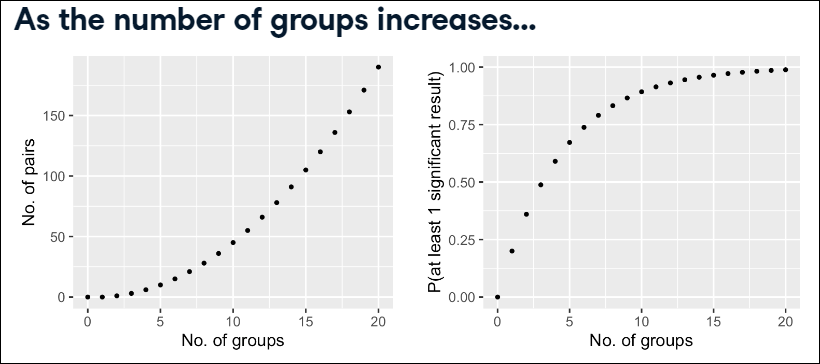
The solution to this is to apply an adjustment to increase the p-values, reducing the chance of getting a false positive. One common adjustment is the Bonferroni correction. Looking at the p-corr column corresponding to corrected p-values, as opposed to the p-unc column for uncorrected, only two of the pairs appear to have significant differences.
pengouin offers more methods.<br>
padjust : string<br>
Method used for testing and adjustment of pvalues.<br>
'none' : no correction [default]<br>
'bonf' : one-step Bonferroni correction<br>
'sidak' : one-step Sidak correction<br>
'holm' : step-down method using Bonferroni adjustments<br>
'fdr_bh' : Benjamini/Hochberg FDR correction<br>
'fdr_by' : Benjamini/Yekutieli FDR correction<br>

### E1/Visualizing many categories
So far in this chapter, we've only considered the case of differences in a numeric variable between two categories. Of course, many datasets contain more categories. Before you get to conducting tests on many categories, it's often helpful to perform exploratory data analysis (EDA), calculating summary statistics for each group and visualizing the distributions of the numeric variable for each category using box plots.

Here, we'll return to the late shipments data, and how the price of each package (pack_price) varies between the three shipment modes (shipment_mode): "Air", "Air Charter", and "Ocean".

In [ ]:
# Calculate the mean pack_price for each shipment_mode
xbar_pack_by_mode = late_shipments.groupby('shipment_mode')['pack_price'].mean()
# Print the grouped means
print(xbar_pack_by_mode)
s_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].std()
print(s_pack_by_mode)
# Boxplot of shipment_mode vs. pack_price
sns.boxplot(x='pack_price',y='shipment_mode',data=late_shipments)
plt.show()

### E2/Conducting an ANOVA test & Pair test
The box plots made it look like the distribution of pack price was different for each of the three shipment modes. However, it didn't tell us whether the mean pack price was different in each category. To determine that, we can use an ANOVA test. The null and alternative hypotheses can be written as follows.

$H _O$:: Pack prices for every category of shipment mode are the same.

$H _A$:: Pack prices for some categories of shipment mode are different.

We'll set a significance level of 0.1.

In [ ]:
# Run an ANOVA for pack_price across shipment_mode
anova_results = pingouin.anova(data=late_shipments,dv='pack_price',between='shipment_mode')

# Print anova_results
print(anova_results)

In [ ]:
# Perform a pairwise t-test on pack price, grouped by shipment mode
pairwise_results = pingouin.pairwise_tests(data=late_shipments,dv='pack_price',between='shipment_mode')

# Print pairwise_results
print(pairwise_results)
# Modify the pairwise t-tests to use Bonferroni p-value adjustment
pairwise_results_bonf = pingouin.pairwise_tests(data=late_shipments, 
                                           dv="pack_price",
                                           between="shipment_mode",
                                           padjust="bonf")

# Print pairwise_results
print('***********************************pairwise_results_bonf********************************************************************',pairwise_results_bonf)

Using the Bonferroni correction results and assuming a significance level of 0.1, for which pairs of shipment modes should you reject the null hypothesis that the pack prices are equal?

"Ocean" and "Air Charter"; "Ocean" and "Air"; "Air Charter" and "Air".(cor ans)

"Ocean" and "Air" and also "Air Charter" and "Air".

"Ocean" and "Air" only.

"Ocean" and "Air Charter" only.

In [ ]:
help(pingouin.pairwise_tests)

# 20.3/ Proportion Tests
## 20.3.1// One-sample proportion tests
#### Chapter 1 recap
The hypothesis tests in Chapter 1 measured whether or not an unknown population proportion was equal to some value. We used bootstrapping on the sample to estimate the standard error of the sample statistic. The standard error was then used to calculate a standardized test statistic, the z-score, which was used to get a p-value, so we could decide whether or not to reject the null hypothesis. A bootstrap distribution can be computationally intensive to calculate, so this time **we'll instead calculate the test statistic without bootstrap dist**.
#### Standardized test statistic for proportions
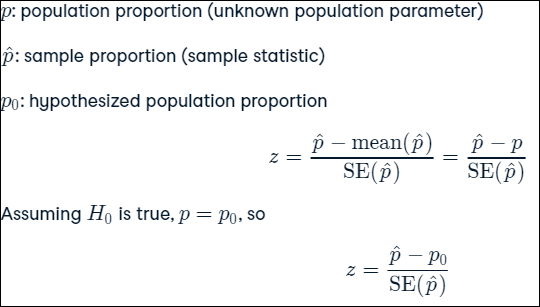

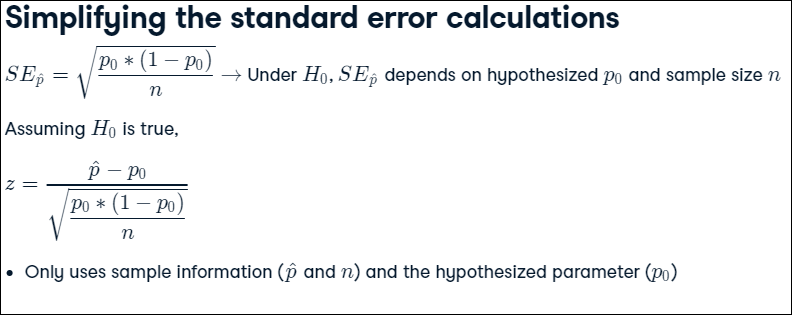

**Why z instead of t?**<br>
We might wonder why we used a z-distribution here, but a t-distribution in Chapter 2. This is the test statistic equation for the two sample mean case.<br> For t dist The standard deviation of the sample, s, is calculated from the sample mean, x-bar. That means that x-bar is used in the numerator to estimate the population mean, and in the denominator to estimate the population standard deviation.<br> This dual usage increases the uncertainty in our estimate of the population parameter. <br>Since t-distributions are effectively a normal distribution with fatter tails, we can use them to account for this **extra uncertainty.**<br> In effect, the t-distribution provides extra caution against mistakenly rejecting the null hypothesis. For proportions, we only use p-hat in the numerator, thus avoiding the problem with uncertainty, and a z-distribution is fine.

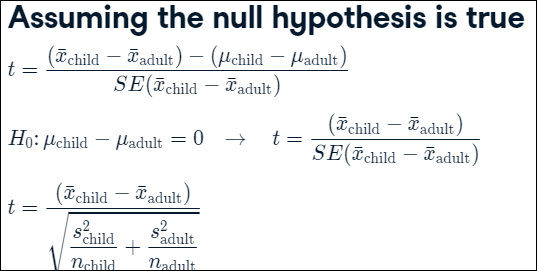

#### <u>Pvalue calculation for z test_left,right,both</u>
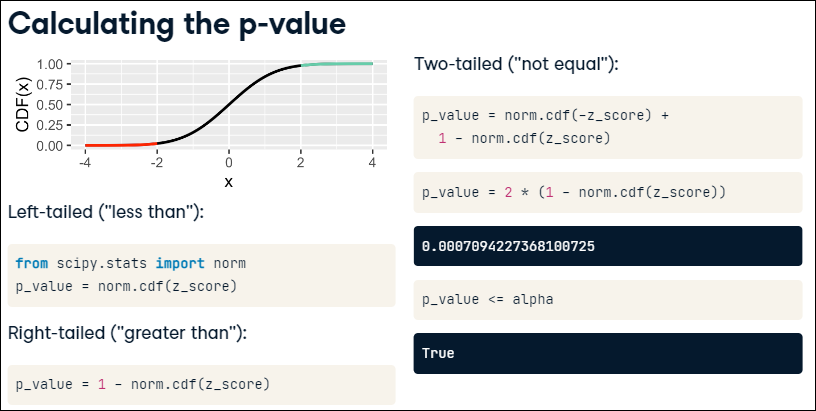

### E1//t for proportions?
Some of the hypothesis tests in this course have used a  test statistic and some have used a  test statistic. To get the correct p-value, you need to use the right type of test statistic.Do tests of proportion(s) use a z or a t test statistic and why?<br>
z:There are two estimates used for unknown values in the test statistic for proportion(s).<br>
t:Since the population standard deviation is always known for proportions, we always compute z-scores.<br>
z:he test statistic for proportion(s) has only one estimate of a parameter instead of two.<br>
t:Proportions are ratios, so you need to estimate the numerator and the denominator.<br>c/3 cor ans

### E2// Test for single proportions(z value)

In [ ]:
# Hypothesize that the proportion of late shipments is 6%
p_0 = 0.06

# Calculate the sample proportion of late shipments
p_hat = (late_shipments['late'] == "Yes").mean()

# Calculate the sample size
n = len(late_shipments)

# Calculate the numerator and denominator of the test statistic
numerator = p_hat - p_0
denominator = np.sqrt(p_0 * (1 - p_0) / n)

# Calculate the test statistic
z_score = numerator / denominator

# Calculate the p-value from the z-score
p_value = 1-norm.cdf(z_score)

# Print the p-value
print(p_value)
##########While bootstrapping can be used to estimate the standard error of any statistic, it is 
##computationally intensive. For proportions, using a simple equation of the hypothesized proportion 
#and sample size is easier to compute.

## 20.3.2//Two-sample proportion tests
The Stack Overflow survey contains a hobbyist variable. The value "Yes" means the user described themselves as a hobbyist and "No" means they described themselves as a professional. We can hypothesize that the proportion of hobbyist users is the 
 same for the under thirty age category as the thirty or over category, which is a two-tailed test. More formally, the null hypothesis is that the difference between the population parameters for each group is zero. Let's set a significance level of 0.5.
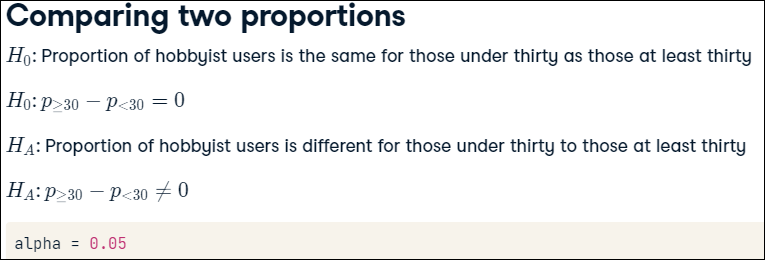

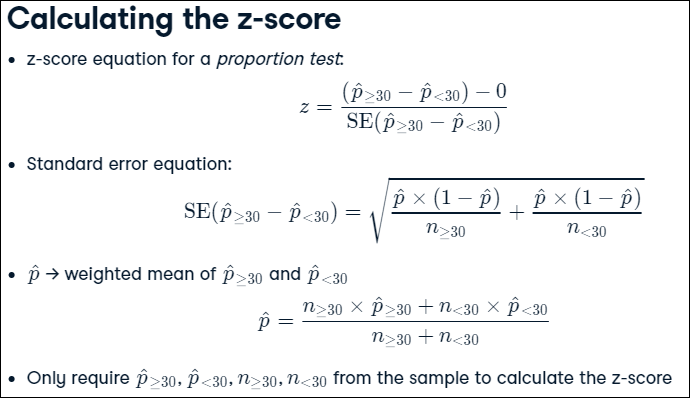

#### E1//Test of two proportions
You may wonder if the amount paid for freight affects whether or not the shipment was late. Recall that in the late_shipments dataset, whether or not the shipment was late is stored in the late column. Freight costs are stored in the freight_cost_group column, and the categories are "expensive" and "reasonable".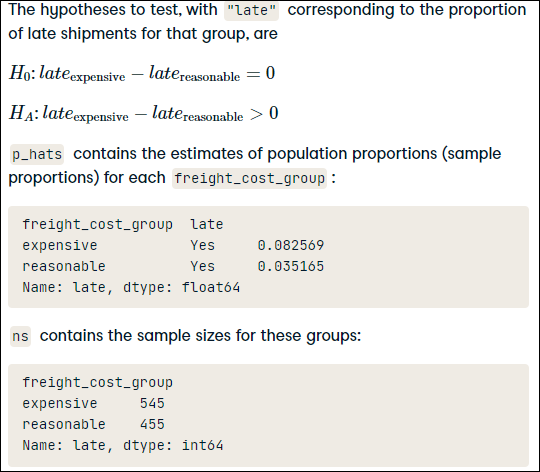

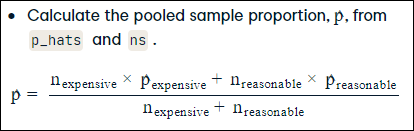

In [ ]:
p_hats=late_shipments.groupby('freight_cost_groups')['late'].value_counts(normalize='True')
print(p_hats)
print(p_hats.index)
type(p_hats)

In [ ]:
### etar jonno 2 hours gese.BAAAAAAAAAAAALLLLLLLLLLLLLLLLLL

p_hats_yes=p_hats.loc[([('expensive', 'Yes'),( 'reasonable', 'Yes')])]
p_hats_yes

In [ ]:
p_hats_yes['expensive']

In [ ]:
p_hats.values

In [ ]:
p_hats_exp=(p_hats[('expensive', 'Yes')])
p_hats_res=([('reasonable', 'Yes')])
p_hats_exp

In [ ]:
##yu=late_shipments.groupby('freight_cost_groups').loc[(late_shipments['late']=='Yes')].value_counts(normalize=True)
#yu


In [ ]:
xq=(late_shipments.groupby('freight_cost_groups')['late'])
print(xq)
#xq.index


In [ ]:
xq['late']=='Yes'

In [ ]:
ns=late_shipments.groupby('freight_cost_groups')['late'].count()
ns_exp=ns['expensive']
ns_res=ns['reasonable']
ns

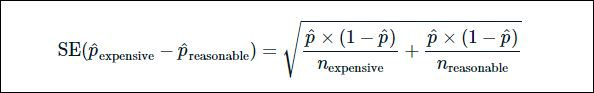

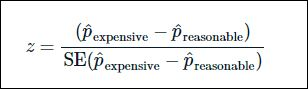

In [ ]:

# Calculate the pooled estimate of the population proportion
p_hat = (p_hats_yes["reasonable"] * ns["reasonable"] + p_hats_yes["expensive"] * ns["expensive"]) / (ns["reasonable"] + ns["expensive"])
print(p_hat)
# Calculate p_hat one minus p_hat
p_hat_times_not_p_hat = p_hat * (1 - p_hat)

# Divide this by each of the sample sizes and then sum
p_hat_times_not_p_hat_over_ns = p_hat_times_not_p_hat / ns["expensive"] + p_hat_times_not_p_hat / ns["reasonable"]

# Calculate the standard error
std_error = np.sqrt(p_hat_times_not_p_hat_over_ns)
print(std_error)
# Calculate the z-score
z_score = (p_hats_yes["expensive"] - p_hats_yes["reasonable"]) / std_error
print('zzzzzz_score',z_score)
# Calculate the p-value from the z-score
p_value = 1-norm.cdf(z_score)

# Print p_value
print(p_value)

### E2//proportions_ztest() for two samples(short and simple)
That took a lot of effort to calculate the p-value, so while it is useful to see how the calculations work, it isn't practical to do in real-world analyses. For daily usage, it's better to use the statsmodels package.

In [ ]:
from statsmodels.stats.proportion import proportions_ztest
# Count the late column values for each freight_cost_group
late_by_freight_cost_group = late_shipments.groupby('freight_cost_groups')['late'].value_counts()

# Print the counts
print(late_by_freight_cost_group)
# Create an array of the "Yes" counts for each freight_cost_group
success_counts = np.array([42, 16])

# Create an array of the total number of rows in each freight_cost_group
n = np.array([489+42, 439+16])

# Run a z-test on the two proportions
z_stat, p_value = proportions_ztest(count=success_counts,nobs=n,alternative='larger')
print(z_stat, p_value)

###yeap. same result

## 20.3.3//Chi-square test of independence
Just as ANOVA extends t-tests to more than two groups, chi-square tests of independence extend proportion tests to more than two groups.**That proportion test had a positive result. The small p-value suggested that there was evidence that the hobbyist and age category variables had an association. If the proportion of hobbyists was the same for each age category, the variables would be considered statistically independent. More formally, two categorical variables are consider <span class="mark">statistically independent</span> when the proportion of successes in the response variable is the same across all categories of the explanatory variable.**
#### Test for independence of variables
The correction argument specifies whether or not to apply Yates' continuity correction, which is a fudge factor for when the sample size is very small and the degrees of freedom is one. Since each group has over one hundred observations, we don't need it here..Yates continuity:https://en.wikipedia.org/wiki/Yates%27s_correction_for_continuity
>>expected, observed, stats = pingouin.chi2_independence(data=stack_overflow, x='hobbyist',y='age_cat', correction=False)
(chi^2 statistic = (z-score)^2)

In [ ]:
import pingouin
expected, observed, stats = pingouin.chi2_independence(data=stack_overflow, x='hobbyist',y='age_cat', correction=False)
print(stats)
print(stack_overflow['age_cat'].value_counts())  ## 2 category
print(stack_overflow['job_sat'].value_counts())  ## 5 category

$H _0$ : Age categories are independent of job satisfaction levels
$H _A$: Age categories are not independent of job satisfaction levels

Lets, α=.1;;The test statistic is denoted chi-square(χ^2). It quantifies how far away the observed results are from the expected values if independence was true.

In [ ]:
props = stack_overflow.groupby('job_sat')['age_cat'].value_counts(normalize=True)
wide_props = props.unstack()
wide_props.plot(kind="bar", stacked=True)

There's some variation here, but we'll need a chi-square independence test to determine whether it's a significant difference.e leave out a correction here since our degrees of freedom is four. 
>Degrees of freedom:
(No. of response categories − 1) × (No. of explanatory categories − 1)
(2 − 1) ∗ (5 − 1) = 4

In [ ]:
expected, observed, stats = pingouin.chi2_independence(data=stack_overflow, x="job_sat", y="age_cat")
print(stats)

In [ ]:
## Variable swipe


props = stack_overflow.groupby('age_cat')['job_sat'].value_counts(normalize=True)
wide_props = props.unstack()
wide_props.plot(kind="bar", stacked=True)

In [ ]:
expected, observed, stats = pingouin.chi2_independence(data=stack_overflow, x="age_cat", y="job_sat")  ### x,y change
print(stats[stats['test'] == 'pearson'])

If we run the chi-square test with the variables swapped, then the results are identical. Because of this, we phrase our questions as **"are variables X and Y independent?", rather than "is variable X independent from variable Y?", since the order doesn't matter.**
We didn't worry about tails in this test, and in fact, the chi2_independence method doesn't have an alternative argument. This is because the chi-square test statistic is based on the square of observed and expected counts, and square numbers are non-negative. That means that chi-square tests tend to be right-tailed tests.

1 Left-tailed chi-square tests are used in statistical forensics to detect if a fit is suspiciously good because the data was fabricated. Chi-square tests of variance can be two-tailed. These are niche uses, though.

### E1//Performing a chi-square test
The chi-square independence test compares proportions of successes of one categorical variable across the categories of another categorical variable.<br>

Trade deals often use a form of business shorthand in order to specify the exact details of their contract. These are International Chamber of Commerce (ICC) international commercial terms, or incoterms for short.

The late_shipments dataset includes a vendor_inco_term that describes the incoterms that applied to a given shipment. The choices are:

EXW: "Ex works". The buyer pays for transportation of the goods.<br>
CIP: "Carriage and insurance paid to". The seller pays for freight and insurance until the goods board a ship.<br>
DDP: "Delivered duty paid". The seller pays for transportation of the goods until they reach a destination port.<br>
FCA: "Free carrier". The seller pays for transportation of the goods.<br>
Perhaps the incoterms affect whether or not the freight costs are expensive. Test these hypotheses with a significance level of 0.01.

$H _O$: vendor_inco_term and freight_cost_group are independent.

$H _O$: vendor_inco_term and freight_cost_group are associated.


In [ ]:
late_shipments.columns

In [ ]:
# Proportion of freight_cost_group grouped by vendor_inco_term
props_chi = late_shipments.groupby('vendor_inco_term')['freight_cost_groups'].value_counts(normalize=True)
# Print props
print(props_chi)
props_chi_yx=late_shipments.groupby('freight_cost_groups')['vendor_inco_term'].value_counts(normalize=True)
wide_props_chi_yx=props_chi_yx.unstack()
# Convert props to wide format
wide_props_chi = props_chi.unstack()
print ('***************wide_props****************')
print(wide_props)

In [ ]:
plt.clf()
wide_props_chi.plot(kind='bar',stacked=True)
wide_props_chi_yx.plot(kind='bar',stacked=True)
plt.show()

In [ ]:
##pip install jupyter-resource-usage
# Determine if freight_cost_group and vendor_inco_term are independent
expected_chi, observed_chi, stats_chi = pingouin.chi2_independence(data=late_shipments,x='freight_cost_groups',y='vendor_inco_term')

# Print results
print(stats_chi[stats_chi['test'] == 'pearson']) 

In [ ]:
print(observed_chi)
print(expected_chi)

## 20.3.3// Chi-square goodness of fit tests
Last time, we used a chi-square test to compare proportions in two categorical variables. This time, we'll use another variant of the chi-square test to compare a single categorical variable to a hypothesized distribution. The Stack Overflow survey contains a fun question about how users feel when they discover that they already visited the top resource, also called a purple link, when trying to solve a coding problem. We can use the dot-value-counts method to get the counts of each group in the purple_link column. We also do a little bit of manipulation here to get a nicely structured DataFrame that we can work with later. First, we rename the leftmost column to be purple_link, assign the counts to n, and finally sort by purple_link, so the responses are in alphabetical order. There are four possible answers stored in the purple_link column.

In [ ]:
purple_link_counts = stack_overflow['purple_link'].value_counts()
purple_link_counts = purple_link_counts.rename_axis('purple_link')\
                .reset_index(name='n')\
                .sort_values('purple_link')
purple_link_counts

Let's hypothesize that half of the users in the population would respond "Hello, old friend", and the other three responses would get one sixth each. We can create a DataFrame for these hypothesized results from a dictionary of key-value pairs for each response. he test statistic, chi-squared, measures how far the observed sample distribution of proportions is from the hypothesized distribution.<br>
$H _O$: The sample matches the hypothesized distribution.<br>
$H _A$: The sample does not match the hypothesized distribution<br>
$χ^2$ :measures how far observed results are from expectations in each group<br>
α=.01

In [ ]:
hypothesized = pd.DataFrame({
'purple_link': ['Amused', 'Annoyed', 'Hello, old friend', 'Indifferent'],
'prop': [1/6, 1/6, 1/2, 1/6]})
#print(hypothesized)
n_total = len(stack_overflow)
hypothesized["n"] = hypothesized["prop"] * n_total
print(hypothesized)

In [ ]:
#######Now Let's create a visualization to see how well the hypothesized counts appear to model the observed counts.

plt.bar(purple_link_counts['purple_link'], purple_link_counts['n'],
color='red', label='Observed')
plt.bar(hypothesized['purple_link'], hypothesized['n'], alpha=0.5,
color='blue', label='Hypothesized')
plt.legend()
plt.show()

To run the test, we use the chisquare method from scipy-dot-stats. There are two required arguments to chisquare: an array-like object for the observed counts, f_obs, and one for the expected counts, f_exp. The p-value returned by the function is very small, much lower than the significance level of point-zero-one, so we conclude that the sample distribution of proportions is different from the hypothesized distribution.

In [ ]:
from scipy.stats import chisquare
chisquare(f_obs=purple_link_counts['n'], f_exp=hypothesized['n'])

### E1//Visualizing goodness of fit
The chi-square goodness of fit test compares proportions of each level of a categorical variable to hypothesized values. Before running such a test, it can be helpful to visually compare the distribution in the sample to the hypothesized distribution.

Recall the vendor incoterms in the late_shipments dataset. You hypothesize that the four values occur with these frequencies in the population of shipments.

In [ ]:
late_shipments['vendor_inco_term'].unique()
late_shipments_DDU=late_shipments['vendor_inco_term']==('DDU')
late_shipments_no_DDU=late_shipments[~late_shipments_DDU]
late_shipments_no_DDU

In [ ]:
hypothesized_2=pd.DataFrame({'vendor_inco_term':['CIP','DDP','EXW','FCA'],'prop':[.05,.1,.75,.1]})
print(hypothesized_2)
incoterm_counts=(late_shipments_no_DDU['vendor_inco_term'].value_counts())
print(incoterm_counts)
incoterm_counts=incoterm_counts.rename_axis('vendor_inco_term').reset_index(name='n')\
                                .sort_values('vendor_inco_term')
print(incoterm_counts)
incoterm_counts.columns



#incoterm_counts_ddu=incoterm_counts.drop(index='DDU')
#print(incoterm_counts)

In [ ]:
# Find the number of rows in late_shipments
n_total = len(late_shipments_no_DDU)
print(n_total)
# Create n column that is prop column * n_total
hypothesized_2["n"] = hypothesized_2["prop"] * n_total

# Plot a red bar graph of n vs. vendor_inco_term for incoterm_counts
plt.bar(incoterm_counts['vendor_inco_term'],incoterm_counts['n'],color='red',label="Observed")

# Add a blue bar plot for the hypothesized counts
plt.bar(hypothesized_2['vendor_inco_term'], hypothesized_2['n'],alpha=.5,color='blue',label="Hypothesized_2")
plt.legend()
plt.show()

Beautiful bars! Two of the bars in the sample are very close to the hypothesized values: one is a little high and one is a little low. Head on over to the next exercise to test if these differences are statistically significant.

In [ ]:
# Perform a goodness of fit test on the incoterm counts n
gof_test = chisquare(f_obs=incoterm_counts['n'], f_exp=hypothesized_2['n'])
gof_test

What should you conclude from the hypothesis test?<br>
Reject the null hypothesis and conclude that n follows the distribution specified by hypothesized.<br>

Fail to reject the null hypothesis and conclude that n does not follow the distribution specified by hypothesized.<br>

Reject the null hypothesis and conclude that n does not follow the distribution specified by hypothesized.<br>

Fail to reject the null hypothesis and conclude that n follows the distribution specified by hypothesized.(corr ans)<br>
# 20.4/ Non-Parametric Tests
## 20.4.1// Assumptions in hypothesis testing
Each hypothesis test we've seen so far makes assumptions about the data. It's only when these assumptions are met that it is appropriate to use that hypothesis test.<br>
**Whether it uses one or multiple samples, every hypothesis test assumes that each sample is randomly sourced from its population.** If we don't have a random sample, then it won't be representative of the population. To check this assumption, we need to know where our data came from. There are no statistical or coding tests we can perform to check this. If in doubt, ask the people involved in data collection, or a domain expert that understands the population being sampled.<br>
**Tests also assume that each observation is independent. There are some special cases like paired t-tests where dependencies between two samples are allowed, but these change the calculations, so we need to understand where such dependencies occur. As we saw with the paired t-test, not accounting for dependencies results in an increased chance of false negative and false positive errors. Not accounting for dependencies is a difficult problem to diagnose during analysis. Ideally, it needs to be discussed before data collection.**<br>
Hypothesis tests also assume that **our sample is large enough that the Central Limit Theorem applies, and the sample distribution can be assumed to be normally distributed.** Smaller samples incur greater uncertainty, which may mean that the Central Limit Theorem does not apply and the sampling distribution might not be normally distributed. The increased uncertainty of a small sample means we get wider confidence intervals on the parameter we are trying to estimate. If the Central Limit Theorem does not apply, the calculations on the sample, and any conclusions drawn from them, could be nonsense, which increases the chance of false negative and false positive errors.<br>
#### Large sample size: t-test
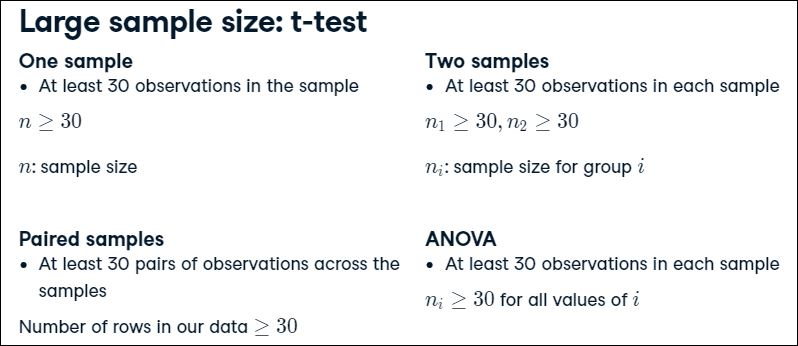

for 2 sample test even if n2>n1 we have to take same size. Sometimes we can get away with less than 30 in each of these tests for paired samples and ANOVA test; the important thing is that the null distribution appears normal. This is often the case at around 30 and that's the reason for this somewhat arbitrary threshold.
#### Large sample size: proportion test
For one sample proportion tests, the sample is considered big enough if it contains at least ten successes and ten failures. Notice that if the probability of success is close to zero or close to one, then we need a bigger sample. 
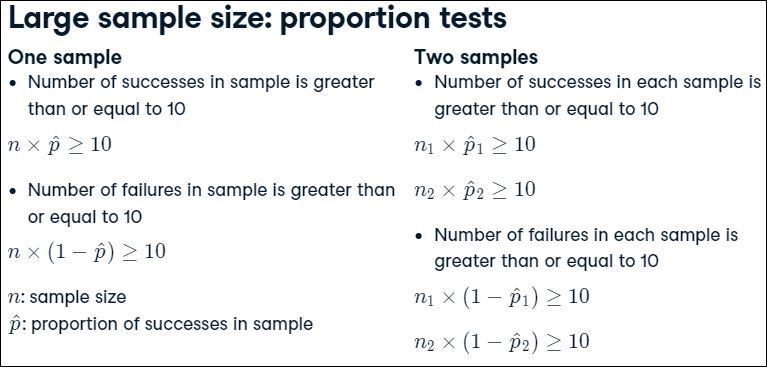
In the two sample case, we require ten successes and ten failures from each sample.
<br>
The chi-square test is slightly more forgiving and only requires five successes and five failures in each group, rather than ten.<br>
One more check we can perform is to calculate a bootstrap distribution and visualize it with a histogram. If we don't see a bell-shaped normal curve, then one of the assumptions hasn't been met. In that case, we should revisit the data collection process, and see if any of the three assumptions of randomness, independence, and sample size do not hold.
### E1//Testing sample size
In order to conduct a hypothesis test and be sure that the result is fair, a sample must meet three requirements: it is a random sample of the population, the observations are independent, and there are enough observations. Of these, only the last condition is easily testable with code.
e1//Get the count of each value in the freight_cost_group column of late_shipments.<br>
Insert a suitable number to inspect whether the counts are "big enough" for a two sample t-test.<br>
e2//Get the count of each value in the late column of late_shipments.
Insert a suitable number to inspect whether the counts are "big enough" for a one sample proportion test.<br>
e3//Get the count of each value in the freight_cost_group column of late_shipments grouped by vendor_inco_term.
Insert a suitable number to inspect whether the counts are "big enough" for a chi-square independence test.<br>
e4//Get the count of each value in the shipment_mode column of late_shipments.
Insert a suitable number to inspect whether the counts are "big enough" for an ANOVA test.

In [ ]:
# Count the freight_cost_group values
counts = late_shipments['freight_cost_groups'].value_counts()
# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 30).all())

In [ ]:
counts = late_shipments['late'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 10).all())

In [ ]:
counts = late_shipments.groupby('vendor_inco_term')['freight_cost_groups'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 5).all())

In [ ]:
# Count the shipment_mode values
counts = late_shipments['shipment_mode'].value_counts()

# Print the result
print(counts)

# Inspect whether the counts are big enough
print((counts >= 30).all())

## 20.4.2//Non-parametric tests
Tests like the z-test, t-test, and ANOVA are all parametric tests that are based on the assumption that the population is normally distributed. Parametric tests also require sample sizes that are "big enough" that the Central Limit Theorem applies. But if the sample size is small or not big enough?? then?

In [31]:
repub_votes_potus_08_12['repub_percent_08'].mean()
repub_votes_potus_08_12['repub_percent_12'].mean()

60.940231860162406

In [29]:
repub_votes_small=repub_votes_potus_08_12.sample(n=5)
print(repub_votes_small)
alpha = 0.01
import pingouin
pingouin.ttest(x=repub_votes_small['repub_percent_08'],
y=repub_votes_small['repub_percent_12'],
paired=True,
alternative="less")

       state    county  repub_percent_08  repub_percent_12      diff
79     Texas      Real         76.044226         80.521173 -4.476947
7    Florida    Citrus         57.388587         60.407114 -3.018527
28    Kansas       Elk         72.663877         76.625274 -3.961397
11   Georgia    Walker         72.678617         74.200767 -1.522150
87  Virginia  Highland         59.845560         65.392781 -5.547221


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-5.436126,4,less,0.002779,"[-inf, -2.25]",0.441941,21.568,0.207001


The small p-value indicates we should reject the null hypothesis, leading us to suspect that the 2008 election had a smaller percentage of Republican votes than the 2012 election. In situations where we aren't sure about these assumptions, or we are certain that the assumptions aren't met, we can use non-parametric tests. They do not make the normal distribution assumptions or the sample size conditions.There are many different ways to perform tests without these parametric assumptions. Here, we'll focus on those relating to ranks.

In [32]:
x_rank = [1, 15, 3, 10, 6]
from scipy.stats import rankdata
rankdata(x_rank)

array([1., 5., 2., 4., 3.])

1=smallest(1) and 15=largest(5) rank. These orderings from smallest to largest are known as the ranks of the elements of x. We can access them with the rankdata method from scipy-dot-stats.
#### Wilcoxon-signed( rank test)
We will use the Wilcoxon-signed rank test, which was developed by Frank Wilcoxon in 1945 and was one of the first non-parametric procedures developed. 
**step_1**The Wilcoxon-signed rank test requires us to calculate the absolute differences in the pairs of data and then rank them. First, we take the differences in the paired values.<br>
**step_2**Works on the ranked absolute di(erences between the pairs of data<br>
**step_3** rankdata of the abs
**step_3** calculate W

In [33]:
#step 1
repub_votes_small['diff'] = repub_votes_small['repub_percent_08'] -repub_votes_small['repub_percent_12']
print(repub_votes_small)

       state    county  repub_percent_08  repub_percent_12      diff
79     Texas      Real         76.044226         80.521173 -4.476947
7    Florida    Citrus         57.388587         60.407114 -3.018527
28    Kansas       Elk         72.663877         76.625274 -3.961397
11   Georgia    Walker         72.678617         74.200767 -1.522150
87  Virginia  Highland         59.845560         65.392781 -5.547221


In [34]:
#step 2
repub_votes_small['abs_diff'] = repub_votes_small['diff'].abs()
print(repub_votes_small)

       state    county  repub_percent_08  repub_percent_12      diff  abs_diff
79     Texas      Real         76.044226         80.521173 -4.476947  4.476947
7    Florida    Citrus         57.388587         60.407114 -3.018527  3.018527
28    Kansas       Elk         72.663877         76.625274 -3.961397  3.961397
11   Georgia    Walker         72.678617         74.200767 -1.522150  1.522150
87  Virginia  Highland         59.845560         65.392781 -5.547221  5.547221


In [35]:
#step 3
repub_votes_small['rank_abs_diff'] = rankdata(repub_votes_small['abs_diff'])
print(repub_votes_small)

       state    county  repub_percent_08  repub_percent_12      diff  \
79     Texas      Real         76.044226         80.521173 -4.476947   
7    Florida    Citrus         57.388587         60.407114 -3.018527   
28    Kansas       Elk         72.663877         76.625274 -3.961397   
11   Georgia    Walker         72.678617         74.200767 -1.522150   
87  Virginia  Highland         59.845560         65.392781 -5.547221   

    abs_diff  rank_abs_diff  
79  4.476947            4.0  
7   3.018527            2.0  
28  3.961397            3.0  
11  1.522150            1.0  
87  5.547221            5.0  


In [36]:
# step 4
T_minus = 1 + 4 + 5 + 2 + 3  #the sum of the ranks with negative differences
T_plus = 0                   #the sum of the ranks with positive differences
W = np.min([T_minus, T_plus])
W # THERE IS ALSO A PINGOUIN TEST SO WE DONT HAVE TO DO THIS MANUALLY

0

In [37]:
alpha = 0.01
pingouin.wilcoxon(x=repub_votes_small['repub_percent_08'],
y=repub_votes_small['repub_percent_12'],
alternative="less")

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,0.0,less,0.03125,-1.0,0.72


This corresponds to a p-value of around three percent, which is over ten times larger than the p-value from the t-test, so we should feel more confident with this result given the small sample size.he Wilcoxon test indicates that we do not have evidence that the 2008 Republican percentages are smaller than the 2012 percentages using this small sample of five rows FOR ALPHA 1%. (BUT THIS Ho IS NOT TRUE.)<br>
The Wilcoxon signed-rank test works well when the assumptions of a paired t-test aren't met.<br>
### E1// Wilcoxon signed-rank test
You'll explore the difference between the proportion of county-level votes for the Democratic candidate in 2012 and 2016 to identify if the difference is significant.<br>
**e1//**Conduct a paired t-test on the percentage columns using an appropriate alternative hypothesis<br>
**e2//**Conduct a Wilcoxon-signed rank test on the same columns



In [62]:
sample_dem_data=dem_votes_potus_12_16
sample_dem_data
county_12=sample_dem_data.groupby('county')['dem_percent_12'].mean()
county_16=sample_dem_data.groupby('county')['dem_percent_16'].mean()

county=pd.merge(county_12,county_16,on='county')
county.columns
county['diff']=county['dem_percent_12']-county['dem_percent_16']
print(type(county))
county.head(30)


<class 'pandas.core.frame.DataFrame'>


,dem_percent_12,dem_percent_16,diff
county,,,
Adair,43.229908,31.978106,11.251802
Alameda,78.853405,78.690013,0.163392
Alamosa,56.753537,45.957631,10.795906
Albany,45.754601,40.386870,5.367731
Alfalfa,15.458473,9.565988,5.892486
Amelia,36.008677,30.227273,5.781404
Amherst,39.412158,32.846194,6.565964
Anderson,31.438334,24.874108,6.564226
Antelope,17.667079,11.673270,5.993809


In [44]:
# Conduct a paired t-test on dem_percent_12 and dem_percent_16
paired_test_results = pingouin.ttest(x=sample_dem_data['dem_percent_12'],y=sample_dem_data['dem_percent_16'],paired=True,alternative='two-sided') 
# Print paired t-test results
print(paired_test_results)

                T  dof alternative          p-val         CI95%   cohen-d  \
T-test  30.298384  499   two-sided  3.600634e-115  [6.39, 7.27]  0.454202   

              BF10  power  
T-test  2.246e+111    1.0  


In [45]:
# Conduct a Wilcoxon test on dem_percent_12 and dem_percent_16
wilcoxon_test_results = pingouin.wilcoxon(x=sample_dem_data['dem_percent_12'],y=sample_dem_data['dem_percent_16'],alternative='two-sided')
# Print Wilcoxon test results
print(wilcoxon_test_results)

           W-val alternative         p-val       RBC      CLES
Wilcoxon  2401.0   two-sided  1.780396e-77  0.961661  0.644816


You are Wilcox-on the right path! Given the large sample size (500), you obtained similar results here between the parametric t-test and non-parametric Wilcoxon test with a very small p-value.

which test to use?>https://www.healthknowledge.org.uk/public-health-textbook/research-methods/1b-statistical-methods/parametric-nonparametric-tests
diff between parametric and non parametric>>https://byjus.com/maths/difference-between-parametric-and-nonparametric/

## 20.4.3// Non-parametric ANOVA and unpaired t-tests
here we will be focusing on non-parametric alternatives to tests of independent numeric samples.
#### Wilcoxon-Mann-Whitney test
>>Also know as the Mann Whitney U test.
A t-test on the ranks of the numeric input
similar to the Wilcoxon test but Works on unpaired data

we need to convert our data from long to wide format. 

In [65]:
age_vs_comp = stack_overflow[['converted_comp', 'age_first_code_cut']]
print(age_vs_comp.head())
age_vs_comp_wide = age_vs_comp.pivot(columns='age_first_code_cut',values='converted_comp')    ##pivot
age_vs_comp_wide.head()

   converted_comp age_first_code_cut
0         77556.0              adult
1         74970.0              child
2        594539.0              child
3       2000000.0              adult
4         37816.0              adult


age_first_code_cut,adult,child
0,77556.0,NaN
1,NaN,74970.0
2,NaN,594539.0
3,2000000.0,NaN
4,37816.0,NaN


we want to compare, in this case, child and adult. alternative sets the type of alternative hypothesis, in this case, that those who code first as children have a higher income than those who code first as adults, which is a right-tailed test. Here, the p-value is shown as around ten to the negative nineteenth power, which is significantly smaller than the significance level.

In [66]:
alpha=0.01
import pingouin
pingouin.mwu(x=age_vs_comp_wide['child'],
y=age_vs_comp_wide['adult'],
alternative='greater')

,U-val,alternative,p-val,RBC,CLES
MWU,744365.5,greater,1.902723e-19,-0.222516,0.611258


### Kruskal-Wallis test
In the same way that ANOVA extends t-tests to more than two groups, the Kruskal-Wallis test extends the Wilcoxon-Mann-Whitney test to more than two groups. That is, the Kruskal-Wallis test is a non-parametric version of ANOVA.<br>


In [67]:
alpha=0.01
pingouin.kruskal(data=stack_overflow,dv='converted_comp',between='job_sat')

,Source,ddof1,H,p-unc
Kruskal,job_sat,4,72.814939,5.772915e-15


Unlike the Wilcoxon-Mann-Whitney test, we don't need to pivot our data here since the kruskal method works on long data. Again, the p-value here is very small and smaller than our significance level. This provides evidence that at least one of the mean compensation totals is different than the others across these five job satisfaction groups.

#### E1//Wilcoxon-Mann-Whitney test
Another class of non-parametric hypothesis tests are called rank sum tests. Ranks are the positions of numeric values from smallest to largest. Think of them as positions in running events: whoever has the fastest (smallest) time is rank 1, second fastest is rank 2, and so on.

By calculating on the ranks of data instead of the actual values, you can avoid making assumptions about the distribution of the test statistic. It's more robust in the same way that a median is more robust than a mean.

One common rank-based test is the Wilcoxon-Mann-Whitney test, which is like a non-parametric t-test.

In [68]:
# Select the weight_kilograms and late columns
weight_vs_late = late_shipments[['weight_kilograms','late']]
# Convert weight_vs_late into wide format
weight_vs_late_wide = weight_vs_late.pivot(columns='late', 
                                           values='weight_kilograms')
weight_vs_late_wide
# Run a two-sided Wilcoxon-Mann-Whitney test on weight_kilograms vs. late
wmw_test =pingouin.mwu(x=weight_vs_late_wide['Yes'],y=weight_vs_late_wide['No'],alternative='two-sided') ### mwu,x,y
# Print the test results
print(wmw_test)

       U-val alternative     p-val       RBC      CLES
MWU  38145.0   two-sided  0.000014 -0.331902  0.665951


The small p-value here leads us to suspect that a difference does exist in the weight of the shipment and whether or not it was late. The Wilcoxon-Mann-Whitney test is useful when you cannot satisfy the assumptions for a parametric test comparing two means, like the t-test.
#### E2//Kruskal-Wallis test
Recall that the Kruskal-Wallis test is a non-parametric version of an ANOVA test, comparing the means across multiple groups. 

In [69]:
# Run a Kruskal-Wallis test on weight_kilograms vs. shipment_mode
kw_test = pingouin.kruskal(data=late_shipments,dv='weight_kilograms',between='shipment_mode')
print(kw_test)

                Source  ddof1           H         p-unc
Kruskal  shipment_mode      2  125.096618  6.848799e-28


The Kruskal-Wallis test yielded a very small p-value, so there is evidence that at least one of the three groups of shipment mode has a different weight distribution than the others. Th Kruskal-Wallis test is comparable to an ANOVA, which tests for a difference in means across multiple groups.<br>

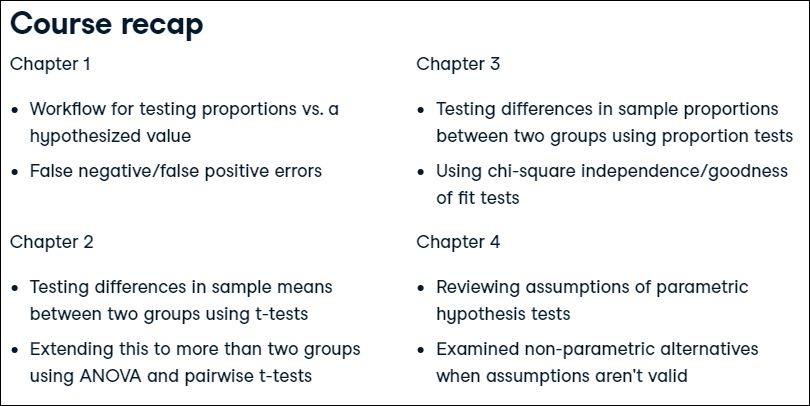
in **Chapter 1**we learned the workflow for testing proportions against a hypothesized value. We calculated the observed statistic, and a z-score, then transformed the z-score to get a p-value. We also learned about false negative and false positive errors.<br>
**Chapter 2**Chapter 2, we learned how to test for differences in means between two groups using t-tests, and how to extend this to more than two groups using ANOVA and pairwise t-tests.<br>
**Chapter 3**In Chapter 3, we returned to proportion responses, and learned how to test for differences in proportions between two groups using proportion tests. We then extended it to more than two groups with chi-square independence tests, and returned to the one sample case with chi-square goodness of fit tests.<br>
**Chapter 4**n Chapter 4, we learned about the assumptions made by parametric hypothesis tests, and saw how non-parametric tests can be used when those assumptions aren't met.<br>
Hypothesis testing is part of a branch of statistics known as inference. DataCamp has more courses that delve deeper into inference. The techniques used in this course are an example of frequentist statistics. A rival paradigm is known as Bayesian statistics,